In [ ]:
# objetivo: minimizar f(x0, x1, x2) = 2.x0 -4.x0.x1 + 3.x1.x2

# haciendo el cambio xi = (1-zi)/2 llegamos a que queremos minimizar:

# g(z0, z1, z2) = 3/4 + z1/4 -3.z2/4 - z0.z1 + 3.z1.z2/4

#solución óptima:
    #  1  1 0 en QUBO
    # -1 -1 1 en Ising
    # 6 en decimal
    


In [2]:
import pennylane as qml

obs = [qml.PauliZ(1),
      qml.PauliZ(2),
      qml.PauliZ(0) @ qml.PauliZ(1),
      qml.PauliZ(1) @ qml.PauliZ(2)]

coefs = [-1/4, 3/4, 1, -3/4]

En este primer ejemplo veremos que ocurre al aplicar la exponencial compleja sobre la superposición equiprobable. En este caso, el resultado será una modificación en fase de los estados pero no en probabilidad. Si estás utilizando una versión antigua de pennylane probablemente no te funcione la función que dibuja el circuito. Simplemente elimina: `qml.draw_mpl(circuit)()`



probs


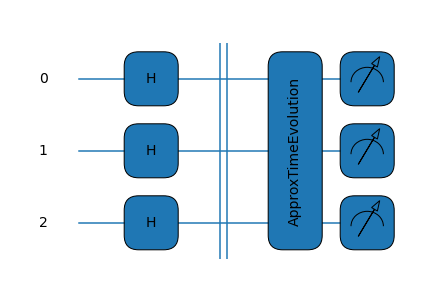

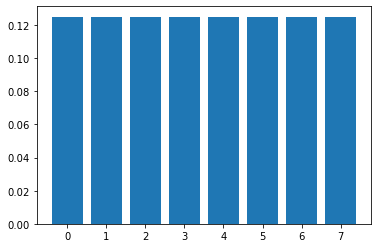

phases


<BarContainer object of 8 artists>

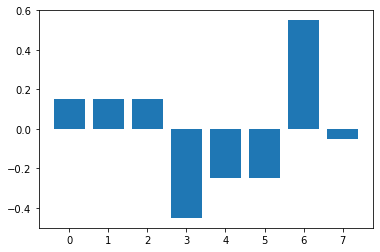

In [3]:
# creamos el Hamiltoniano

import pennylane as qml
import cmath
import matplotlib.pyplot as plt



H = qml.Hamiltonian(coefs, obs)

gamma = 0.2
dev = qml.device("default.qubit", wires = H.wires)

@qml.qnode(dev)
def circuit():
    for i in dev.wires:
        qml.Hadamard(wires = i)
    qml.Barrier(wires = dev.wires)
    qml.ApproxTimeEvolution(H, -gamma, 1)
    return qml.state()

qml.draw_mpl(circuit)()

print("probs")

plt.show()
probs = [abs(i)**2 for i in circuit()]
plt.bar(range(len(probs)), probs)

phases = []
for i in circuit():
    phases.append(cmath.phase(i))
    
plt.show()
print("phases")
plt.bar(range(len(phases)), phases)

Veamos que ocurre si ahora añadimos la puerta $U(B,\beta)$. La fase se transformará en probabilidad consiguiendo resaltar aquellos estados con mayor energía.

probs


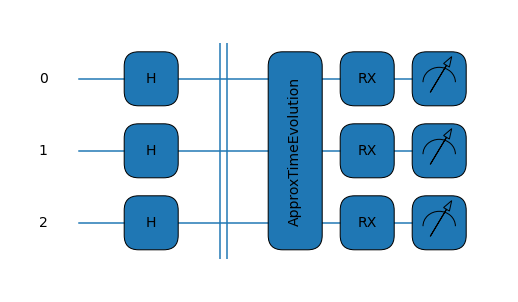

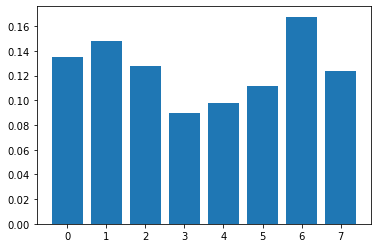

phases


<BarContainer object of 8 artists>

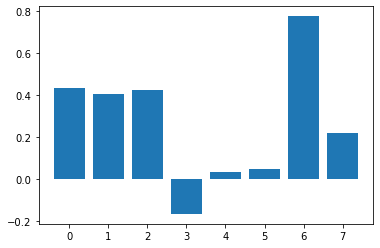

In [4]:

H = qml.Hamiltonian(coefs, obs)

gamma = 0.2
beta = 0.2
dev = qml.device("default.qubit", wires = H.wires)

@qml.qnode(dev)
def circuit():
    for i in dev.wires:
        qml.Hadamard(wires = i)
    qml.Barrier(wires = dev.wires)
    qml.ApproxTimeEvolution(H, -gamma, 1)
    for i in dev.wires:
        qml.RX(-beta, wires = i)
    return qml.state()

qml.draw_mpl(circuit)()

print("probs")

plt.show()
probs = [abs(i)**2 for i in circuit()]
plt.bar(range(len(probs)), probs)

phases = []
for i in circuit():
    phases.append(cmath.phase(i))
    
plt.show()
print("phases")
plt.bar(range(len(phases)), phases)

Finalmente, podemos ejecutar el bloque final repetidamente para continuar aumentando la probabilidad buscada.

probs


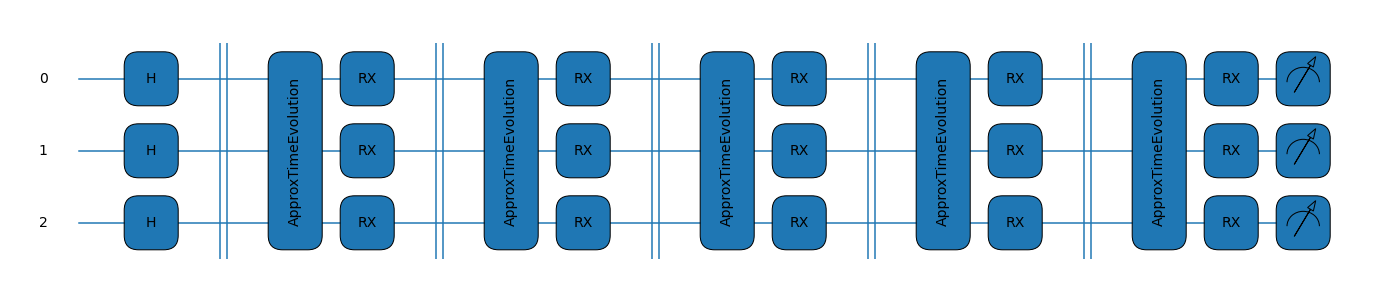

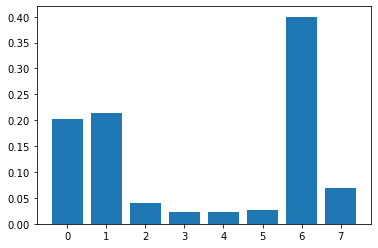

phases


<BarContainer object of 8 artists>

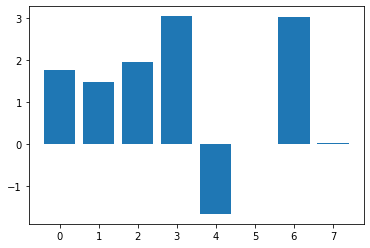

In [5]:

H = qml.Hamiltonian(coefs, obs)

gamma = 0.2
beta = 0.2

dev = qml.device("default.qubit", wires = H.wires)

@qml.qnode(dev)
def circuit():
    for i in dev.wires:
        qml.Hadamard(wires = i)
        
    for _ in range(5):
        qml.Barrier(wires = dev.wires)
        qml.ApproxTimeEvolution(H, -gamma, 1)
        for i in dev.wires:
            qml.RX(-beta, wires = i)
            
    return qml.state()

qml.draw_mpl(circuit)()

print("probs")

plt.show()
probs = [abs(i)**2 for i in circuit()]
plt.bar(range(len(probs)), probs)

phases = []
for i in circuit():
    phases.append(cmath.phase(i))
    
plt.show()
print("phases")
plt.bar(range(len(phases)), phases)